# Behavior Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

Check out the respective elements video: https://www.youtube.com/watch?v=DLYqnj40eAM

Use this as info NB https://github.com/SFB1089/workflow-calcium-imaging/blob/main/notebooks/07-downstream-analysis-optional.ipynb


In [1]:
import os
# change to the upper level folder to detect dj_loc<al_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()


[2023-08-04 14:40:59,806][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-08-04 14:40:59,852][INFO]: Connected tobiasr@172.26.128.53:3306


DataJoint connection (connected) tobiasr@172.26.128.53:3306

Manual entry:

### Imports and activation

Importing schema from `adamacs.pipeline` automatically activates relevant schema.

In [2]:
import datajoint as dj
from adamacs.pipeline import subject, session, surgery, scan, event, trial, imaging, behavior
from adamacs import utility
from adamacs.ingest import behavior as ibe
from pywavesurfer import ws
import matplotlib.pyplot as plt
import numpy as np
# check https://elements.datajoint.org/description/event/ for doc

Assign easy names for relevant tables

In [3]:
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

## Ingesting behavior

In [4]:
scan.ScanInfo()

session_id,scan_id,nfields number of fields,nchannels number of channels,ndepths Number of scanning depths (planes),nframes number of recorded frames,nrois number of ROIs (see scanimage's multi ROI imaging),x (um) ScanImage's 0 point in the motor coordinate system,y (um) ScanImage's 0 point in the motor coordinate system,z (um) ScanImage's 0 point in the motor coordinate system,fps (Hz) frames per second - Volumetric Scan Rate,bidirectional true = bidirectional scanning,usecs_per_line microseconds per scan line,fill_fraction raster scan temporal fill fraction (see scanimage),scan_datetime datetime of the scan,scan_duration (seconds) duration of the scan,userfunction_info string argument of file consolidation userfunction 1
sess9FGLE1FN,scan9FGLE1FN,1,1,1,27000,0,39113.7,18761.0,9571.63,29.9784,1,63.1769,0.712867,None,900.648,bench2p
sess9FGLEFJ3,scan9FGLEFJ3,1,1,1,27000,0,39113.2,18761.0,9571.63,29.9784,1,63.1769,0.712867,None,900.648,bench2p
sess9FH37WBZ,scan9FH37WBZ,1,1,1,27000,0,39110.1,16727.9,19543.1,29.9592,1,63.2172,0.712867,None,901.226,bench2p
sess9FHDA7AI,scan9FHDA7AI,1,1,1,4620,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,300.302,openfield
sess9FHDA7AI,scan9FHDADB9,1,1,1,4620,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,300.302,openfield
sess9FHELAYA,scan9FHELAYA,1,1,1,9230,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,599.955,openfield
sess9FHELAYA,scan9FHELMRY,1,1,1,9230,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,599.955,openfield
sess9FHELAYA,scan9FHELX2S,1,1,1,9230,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,599.955,openfield
sess9FHELAYA,scan9FHEMBE2,1,1,1,9230,0,-2687.11,-30474300.0,-123831000.0,15.3845,1,250.001,0.95,None,599.955,openfield
sess9FHS7Y22,scan9FHS7Y22,1,1,1,9230,0,0.0,0.0,0.0,15.3845,1,250.003,0.9,None,599.955,openfield


In [5]:
# trial.TrialType().delete()
# trial.Trial.delete()
# trial.TrialEvent.delete()

In [7]:
# scansi = "scan9FJ4IJOQ"
scansi = "scan9FI8DYIV"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0]
sessi = (scan.Scan & f'scan_id = "{scansi}"').fetch('session_id')[0]
aux_setup_typestr = (scan.ScanInfo() & scan_key).fetch("userfunction_info")[0]

# ibe.ingest_aux(sessi,scansi,verbose=False, aux_setup_type=aux_setup_typestr)

In [8]:
scan.ScanInfo() & scan_key

session_id,scan_id,nfields number of fields,nchannels number of channels,ndepths Number of scanning depths (planes),nframes number of recorded frames,nrois number of ROIs (see scanimage's multi ROI imaging),x (um) ScanImage's 0 point in the motor coordinate system,y (um) ScanImage's 0 point in the motor coordinate system,z (um) ScanImage's 0 point in the motor coordinate system,fps (Hz) frames per second - Volumetric Scan Rate,bidirectional true = bidirectional scanning,usecs_per_line microseconds per scan line,fill_fraction raster scan temporal fill fraction (see scanimage),scan_datetime datetime of the scan,scan_duration (seconds) duration of the scan,userfunction_info string argument of file consolidation userfunction 1
sess9FI8DYIV,scan9FI8DYIV,1,1,1,10200,0,28804.8,1861.38,46065.3,29.9784,1,63.1769,0.712867,None,340.245,bench2p


In [9]:
event.Event & scan_key 

session_id,scan_id,event_type,event_start_time (second) relative to recording start,event_end_time (second) relative to recording start
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,23.1494,23.3748
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,25.1394,25.2906
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,26.57,26.6867
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,27.7388,27.8327
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,36.3997,36.7891
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,55.9618,56.2951
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,58.5041,58.66
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,60.0892,60.2059
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,61.3354,61.4362
sess9FI8DYIV,scan9FI8DYIV,Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;,62.4051,64.4368


In [10]:
stims_per_trial = len(set((event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_type")))
all_stims = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_type")
trial_stims = {x: list(all_stims).count(x) for x in all_stims}
trials = set([list(all_stims).count(x) for x in all_stims])
stims = len
print(trial_stims)
print(trials)


{'Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0;': 10, 'Black_Flash;Full_Field_Chirp;0;0;360;0;0;0;': 20, 'Frequency_Ramp;Full_Field_Chirp;0;0;360;0;0;0;': 10, 'Grey_Screen;Full_Field_Chirp;0;0;360;0;0;0;': 30, 'White_Flash;Full_Field_Chirp;0;0;360;0;0;0;': 10}
{10, 20, 30}


In [10]:
trial_start_edges = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_start_time",order_by = "event_start_time")[::stims_per_trial] 
trial_end_edges = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_end_time",order_by = "event_end_time")[stims_per_trial-1::stims_per_trial] 
trial_event_name = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_type")[0].split(':')[0]
# trial.TrialType().insert1({'trial_type': trial_event_name, 'trial_type_description': ''}, skip_duplicates=True) 

In [11]:
(event.Event & scan_key & 'event_type LIKE "%;%"').fetch(format = "frame",order_by = "event_start_time")

event_end_time
session_id   scan_id      event_type                                     event_start_time                
sess9FI8DYIV scan9FI8DYIV Grey_Screen;Full_Field_Chirp;0;0;360;0;0;0;    4.3257                   8.32755
                          Black_Flash;Full_Field_Chirp;0;0;360;0;0;0;    10.3418                 14.35880
                          White_Flash;Full_Field_Chirp;0;0;360;0;0;0;    18.3870                 21.14230
                          Black_Flash;Full_Field_Chirp;0;0;360;0;0;0;    21.3598                 21.80710
                          Grey_Screen;Full_Field_Chirp;0;0;360;0;0;0;    21.9580                 22.29150
...                                                                                                   ...
                          Black_Flash;Full_Field_Chirp;0;0;360;0;0;0;    61.8854                 61.98550
                          Grey_Screen;Full_Field_Chirp;0;0;360;0;0;0;    62.0187                 62.11880
                          Frequency_Ramp;Full_Field_Chirp;0;0;360;0;0;0; 62.1521                 62.24100
                          Grey_Screen;Full_Field_Chirp;0;0;360;0;0;0;    62.2882                 62.37160
                          Amplitude_Ramp;Full_Field_Chirp;0;0;360;0;0;0; 62.4051                 64.43680

[80 rows x 1 columns]

In [12]:
trial.TrialType()

trial_type,trial_type_description
Moving_Bars,Stimulus nomenclature: Type; Class; Azimuth; Elevation; Size; Orientation; Spatial Frequency; Temporal Frequency
Moving_Gratings,Stimulus nomenclature: Type; Class; Azimuth; Elevation; Size; Orientation; Spatial Frequency; Temporal Frequency
Size_Tuning,Stimulus nomenclature: Type; Class; Azimuth; Elevation; Size; Orientation; Spatial Frequency; Temporal Frequency
VisibleStim,


In [13]:
trial_start_edges

NameError: name 'trial_start_edges' is not defined

In [14]:
trial_end_edges

array([ 86.7336, 170.366 , 254.383 , 338.401 , 422.417 , 506.434 ,
       590.449 , 674.466 , 758.483 , 842.5   ])

In [15]:
event_names = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_type",order_by = "event_start_time")
event_onsets = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_start_time",order_by = "event_start_time")

In [16]:
event_onsets

array([ 6.6477, 13.6126, 20.6307, 27.6324, 34.6493, 41.679 , 48.6898,
       55.7182, 62.7412, 69.7393, 76.7617, 83.7607])

# Ingestions!

In [7]:

# ibe.ingest_aux(sessi,scansi, verbose=True, aux_setup_type="bench2p")
ibe.get_and_ingest_trial_times(scansi, aux_setup_typestr)     

ValueError: slice step cannot be zero

# example queries

In [17]:
scansi = "scan9FJ5LVCL"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 

(event.Event & scan_key & f'event_type LIKE "%;%"').fetch(format = "frame", order_by = "event_start_time")

event_end_time
session_id   scan_id      event_type                                         event_start_time                
sess9FJ5LVCL scan9FJ5LVCL Moving_Gratings:240;Moving_Gratings;0;10;50:50;... 6.6477                   9.56025
                          Moving_Gratings:120;Moving_Gratings;0;10;50:50;... 13.6126                 16.56870
                          Moving_Gratings:330;Moving_Gratings;0;10;50:50;... 20.6307                 23.58330
                          Moving_Gratings:180;Moving_Gratings;0;10;50:50;... 27.6324                 30.60070
                          Moving_Gratings:90;Moving_Gratings;0;10;50:50;9... 34.6493                 37.61660
...                                                                                                       ...
                          Moving_Gratings:150;Moving_Gratings;0;10;50:50;... 811.4180               814.43300
                          Moving_Gratings:300;Moving_Gratings;0;10;50:50;... 818.4380               821.44900
                          Moving_Gratings:180;Moving_Gratings;0;10;50:50;... 825.4510               828.46600
                          Moving_Gratings:330;Moving_Gratings;0;10;50:50;... 832.4700               835.49100
                          Moving_Gratings:210;Moving_Gratings;0;10;50:50;... 839.4850               842.50000

[120 rows x 1 columns]

In [18]:
# example: get stimulus onsets and offsets of certain trials fro a single stimulus

scansi = "scan9FJ5LVCL"
scan_key = (scan.Scan & f'scan_id = "{scansi}"').fetch('KEY')[0] 

orientation = 180

trialnum = 2

dataframe = (event.Event * trial.TrialEvent & scan_key & f'event_type LIKE "%{orientation}%"' & f"trial_id <= {trialnum}").fetch(format = "frame")
dataframe

event_end_time
session_id   scan_id      event_type                                         event_start_time trial_id                
sess9FJ5LVCL scan9FJ5LVCL Moving_Gratings:180;Moving_Gratings;0;10;50:50;... 27.6324          1                30.6007
                                                                             90.1685          2                93.1832

In [19]:
# example: get stimulus onsets and offsets of certain trials fro a single stimulus
temporal_freq = (event.Event * trial.TrialEvent & scan_key & f'event_type LIKE "%{orientation}%"' & f"trial_id <= {trialnum}").fetch("event_type")[0].split(";")[7]

print(temporal_freq)

3


In [20]:
trialnum = 1 # 1-indexed!
TrialEvent_query_keys = (event.Event * trial.Trial & scan_key & f'event_type LIKE "%;%"' & f'event_start_time <= "{trial_end_edges[trialnum-1]}"' & f'event_end_time >= "{trial_start_edges[trialnum-1]}"' & f'trial_id= "{trialnum}"').fetch(format = "frame", order_by = "event_start_time")

In [21]:
TrialEvent_query_keys

event_end_time   
session_id   scan_id      event_type                                         event_start_time trial_id                   
sess9FJ5LVCL scan9FJ5LVCL Moving_Gratings:240;Moving_Gratings;0;10;50:50;... 6.6477           1                9.56025  \
                          Moving_Gratings:120;Moving_Gratings;0;10;50:50;... 13.6126          1               16.56870   
                          Moving_Gratings:330;Moving_Gratings;0;10;50:50;... 20.6307          1               23.58330   
                          Moving_Gratings:180;Moving_Gratings;0;10;50:50;... 27.6324          1               30.60070   
                          Moving_Gratings:90;Moving_Gratings;0;10;50:50;9... 34.6493          1               37.61660   
                          Moving_Gratings:60;Moving_Gratings;0;10;50:50;6... 41.6790          1               44.63350   
                          Moving_Gratings:270;Moving_Gratings;0;10;50:50;... 48.6898          1               51.64980   
                          Moving_Gratings:210;Moving_Gratings;0;10;50:50;... 55.7182          1               58.66630   
                          Moving_Gratings:30;Moving_Gratings;0;10;50:50;3... 62.7412          1               65.68300   
                          Moving_Gratings:300;Moving_Gratings;0;10;50:50;... 69.7393          1               72.70090   
                          Moving_Gratings:150;Moving_Gratings;0;10;50:50;... 76.7617          1               79.71770   
                          Moving_Gratings:0;Moving_Gratings;0;10;50:50;0;... 83.7607          1               86.73360   

                                                                                                             trial_type   
session_id   scan_id      event_type                                         event_start_time trial_id                    
sess9FJ5LVCL scan9FJ5LVCL Moving_Gratings:240;Moving_Gratings;0;10;50:50;... 6.6477           1         Moving_Gratings  \
                          Moving_Gratings:120;Moving_Gratings;0;10;50:50;... 13.6126          1         Moving_Gratings   
                          Moving_Gratings:330;Moving_Gratings;0;10;50:50;... 20.6307          1         Moving_Gratings   
                          Moving_Gratings:180;Moving_Gratings;0;10;50:50;... 27.6324          1         Moving_Gratings   
                          Moving_Gratings:90;Moving_Gratings;0;10;50:50;9... 34.6493          1         Moving_Gratings   
                          Moving_Gratings:60;Moving_Gratings;0;10;50:50;6... 41.6790          1         Moving_Gratings   
                          Moving_Gratings:270;Moving_Gratings;0;10;50:50;... 48.6898          1         Moving_Gratings   
                          Moving_Gratings:210;Moving_Gratings;0;10;50:50;... 55.7182          1         Moving_Gratings   
                          Moving_Gratings:30;Moving_Gratings;0;10;50:50;3... 62.7412          1         Moving_Gratings   
                          Moving_Gratings:300;Moving_Gratings;0;10;50:50;... 69.7393          1         Moving_Gratings   
                          Moving_Gratings:150;Moving_Gratings;0;10;50:50;... 76.7617          1         Moving_Gratings   
                          Moving_Gratings:0;Moving_Gratings;0;10;50:50;0;... 83.7607          1         Moving_Gratings   

                                                                                                        trial_start_time   
session_id   scan_id      event_type                                         event_start_time trial_id                     
sess9FJ5LVCL scan9FJ5LVCL Moving_Gratings:240;Moving_Gratings;0;10;50:50;... 6.6477           1                   6.6477  \
                          Moving_Gratings:120;Moving_Gratings;0;10;50:50;... 13.6126          1                   6.6477   
                          Moving_Gratings:330;Moving_Gratings;0;10;50:50;... 20.6307          1                   6.6477   
                          Moving_Gratings:180;Moving

In [22]:
len(TrialEvent_query_keys)

12

In [ ]:
trial.TrialEvent.insert(TrialEvent_query_keys,  allow_direct_insert=True, skip_duplicates=True, ignore_extra_fields=True)

In [ ]:
trial_start_edges = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_start_time",order_by = "event_start_time")[::stims_per_trial] 
trial_end_edges = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_end_time",order_by = "event_end_time")[stims_per_trial-1::stims_per_trial]     
    
trial_event_name = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_type")[0].split(':')[0]
trial.TrialType().insert1({'trial_type': trial_event_name, 'trial_type_description': ''}, skip_duplicates=True)


In [ ]:
for trialnum in enumerate(trial_start_edges):
    trial.Trial.insert1({'session_id': sessi, 'scan_id': scansi, 'trial_id': trialnum[0], 'trial_type': trial_event_name, 'trial_start_time': trial_start_edges[trialnum[0]], 'trial_stop_time': trial_end_edges[trialnum[0]]},  allow_direct_insert=True, skip_duplicates=True)
                
    event_names = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_type",order_by = "event_start_time")
    event_onsets = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_start_time",order_by = "event_start_time")
    

In [ ]:
event_names

In [ ]:
                trial.TrialEvent.insert1({'session_id': session_key, 'scan_id': scan_key, 'trial_id': trialnum[0], 'event_type': event_single, 'event_start_time': event_onsets[trialnum[0]]},  allow_direct_insert=True, skip_duplicates=True)

In [ ]:
event_names = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_type",order_by = "event_start_time")
event_onsets = (event.Event & scan_key & 'event_type LIKE "%;%"' & f"event_end_time < {trial_end_edges[0]}").fetch("event_start_time",order_by = "event_start_time")


In [ ]:
scan_key

In [ ]:
 trial.TrialEvent.insert1({'session_id': sessi, 'scan_id': scansi, 'trial_id': 0, 'trial_type': trial_event_name})

In [ ]:
trial.TrialEvent.insert1({'session_id': session_key, 'scan_id': scan_key, 'trial_id': trialnum[0], 'trial_type': trial_event_name, 'trial_start_time': trial_start_edges[trialnum[0]], 'trial_stop_time': trial_end_edges[trialnum[0]]},  allow_direct_insert=True, skip_duplicates=True)

#  Plot the aux file

In [17]:
from element_interface.utils import find_full_path
from adamacs.paths import get_experiment_root_data_dir

bpod_path_relative = (event.BehaviorRecording.File & scan_key).fetch1("filepath")
auxpath = list(find_full_path(
    get_experiment_root_data_dir(), bpod_path_relative
).parent.glob("*h5"))

print(auxpath)

[PosixPath('/datajoint-data/data/tobiasr/LE_ROS-1518_2023-05-25_scan9FI8DYIV_sess9FI8DYIV/scan9FI8DYIV_LE_ROS-1518_2030.h5')]


In [18]:
aux_setup_typestr = (scan.ScanInfo() & 'scan_id = "' + scansi + '"').fetch("userfunction_info")[0]
aux_setup_typestr

'bench2p'

In [19]:
curr_file = ws.loadDataFile(filename=auxpath[0], format_string='double' )

/home/tobiasr/miniconda3/envs/dj_pure/lib/python3.8/site-packages/pywavesurfer/ws.py:46: RuntimeWarning: You are reading a WaveSurfer file version this module was not tested with: file version 1.0.6, latest version tested: 0.982
  warnings.warn('You are reading a WaveSurfer file version this module was not tested with: '


In [20]:
sweep = [x for x in curr_file.keys() if 'sweep' in x][0]

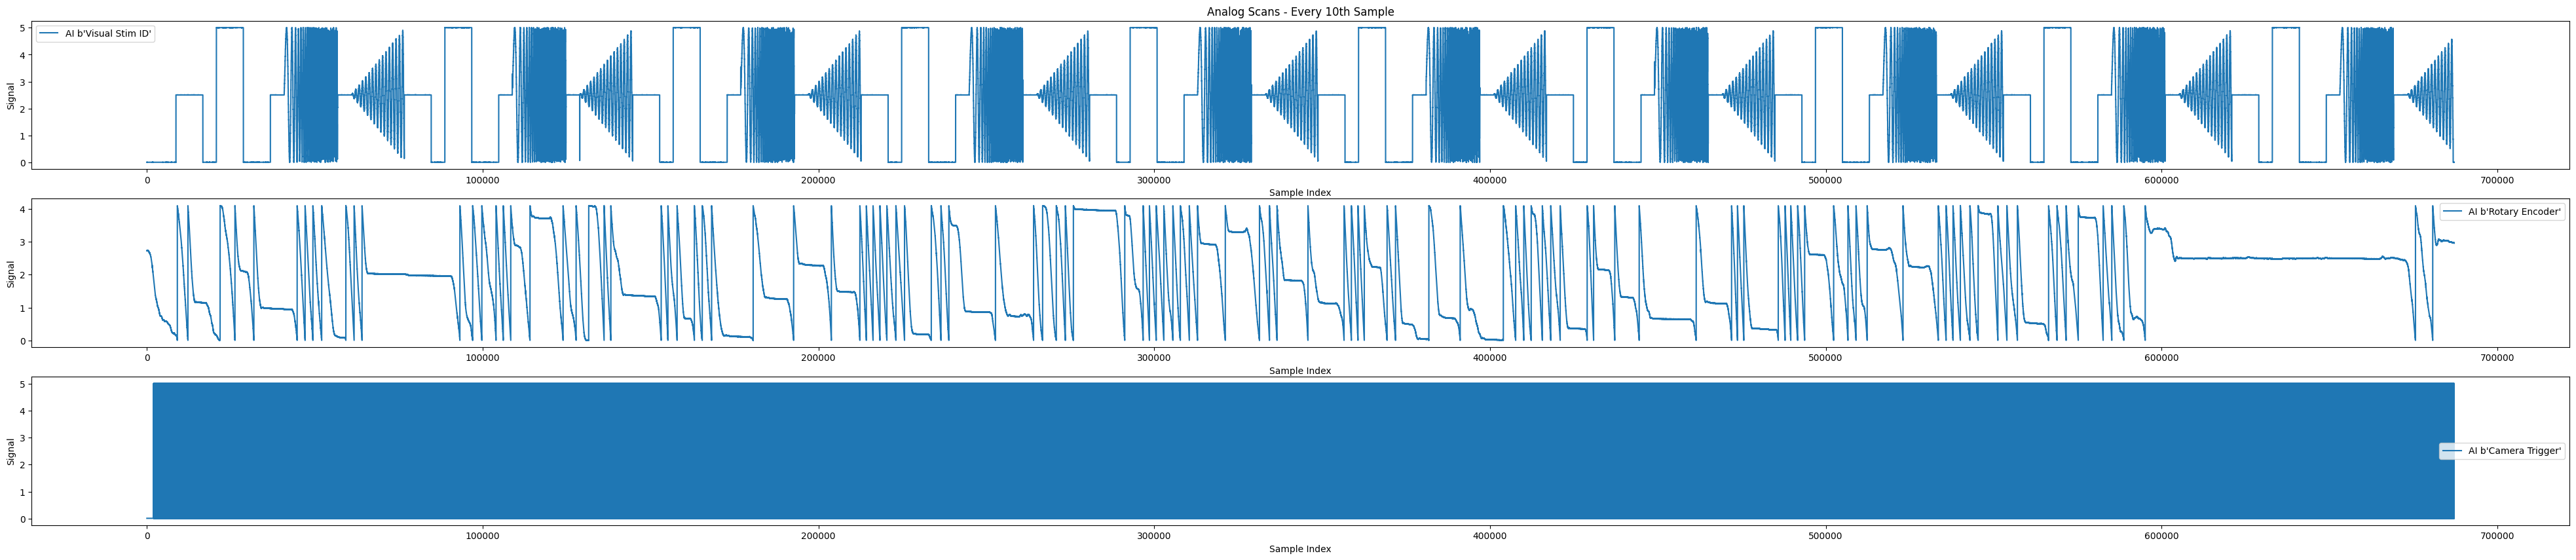

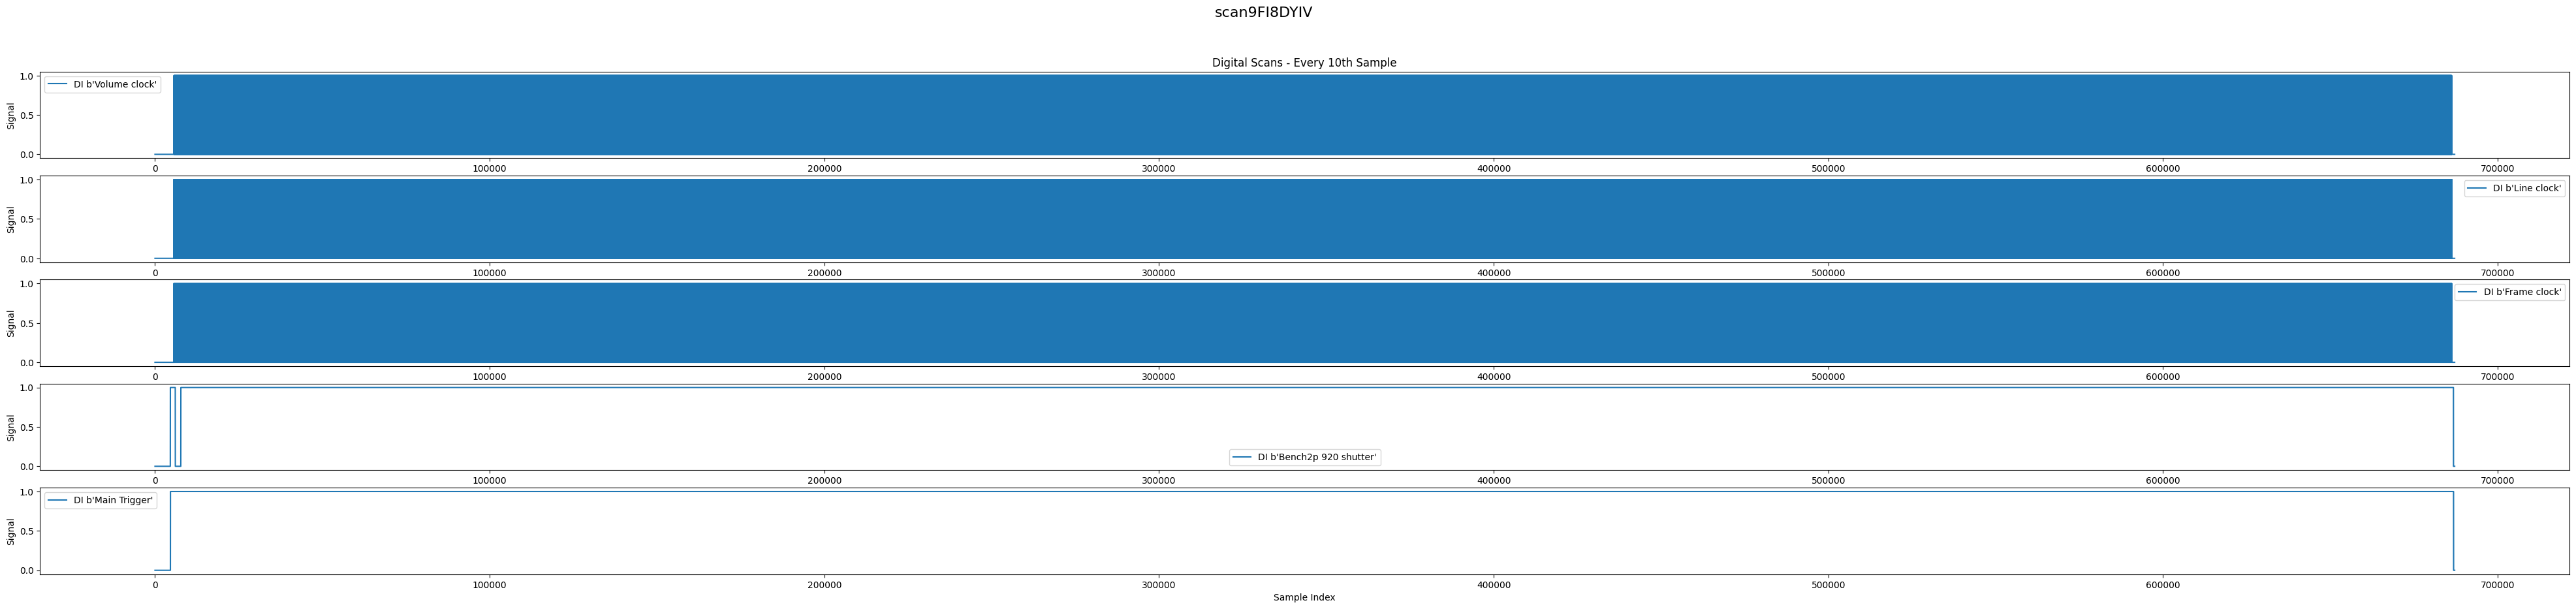

In [21]:
import numpy as np

analog_scans = curr_file[sweep]['analogScans']
analog_labels = curr_file['header']['AIChannelNames']
digital_labels = curr_file['header']['DIChannelNames']
sr = curr_file['header']['AcquisitionSampleRate'][0][0]
digital_scans = ibe.demultiplex(curr_file[sweep]['digitalScans'][0], np.shape(digital_labels)[0])
step = 10

# Plotting analogScans
# plt.figure(figsize=(12, 6))
# plt.title("Analog Scans")

# Creating subplots
fig, axes = plt.subplots(nrows=analog_scans.shape[0], ncols=1, figsize=(50, 10))

# Plotting analogScans
axes[0].set_title(f"Analog Scans - Every {step}th Sample")
for i in range(analog_scans.shape[0]):
     axes[i].plot(analog_scans[i][::step], label=f"AI {analog_labels[i]}")
     axes[i].legend()
     axes[i].set_xlabel("Sample Index")
     axes[i].set_ylabel("Signal")

plt.show()


# Creating subplots
fig, axes = plt.subplots(nrows=digital_scans.shape[0], ncols=1, figsize=(50, 10))

# Plotting analogScans
axes[0].set_title(f"Digital Scans - Every {step}th Sample")
for i in range(digital_scans.shape[0]):
     axes[i].plot(digital_scans[i][::step], label=f"DI {digital_labels[::-1][i]}")
     axes[i].set_xlabel("Sample Index")
     axes[i].set_ylabel("Signal")
     axes[i].legend()
     
fig.suptitle(scan_key["scan_id"], fontsize=16)

plt.show()


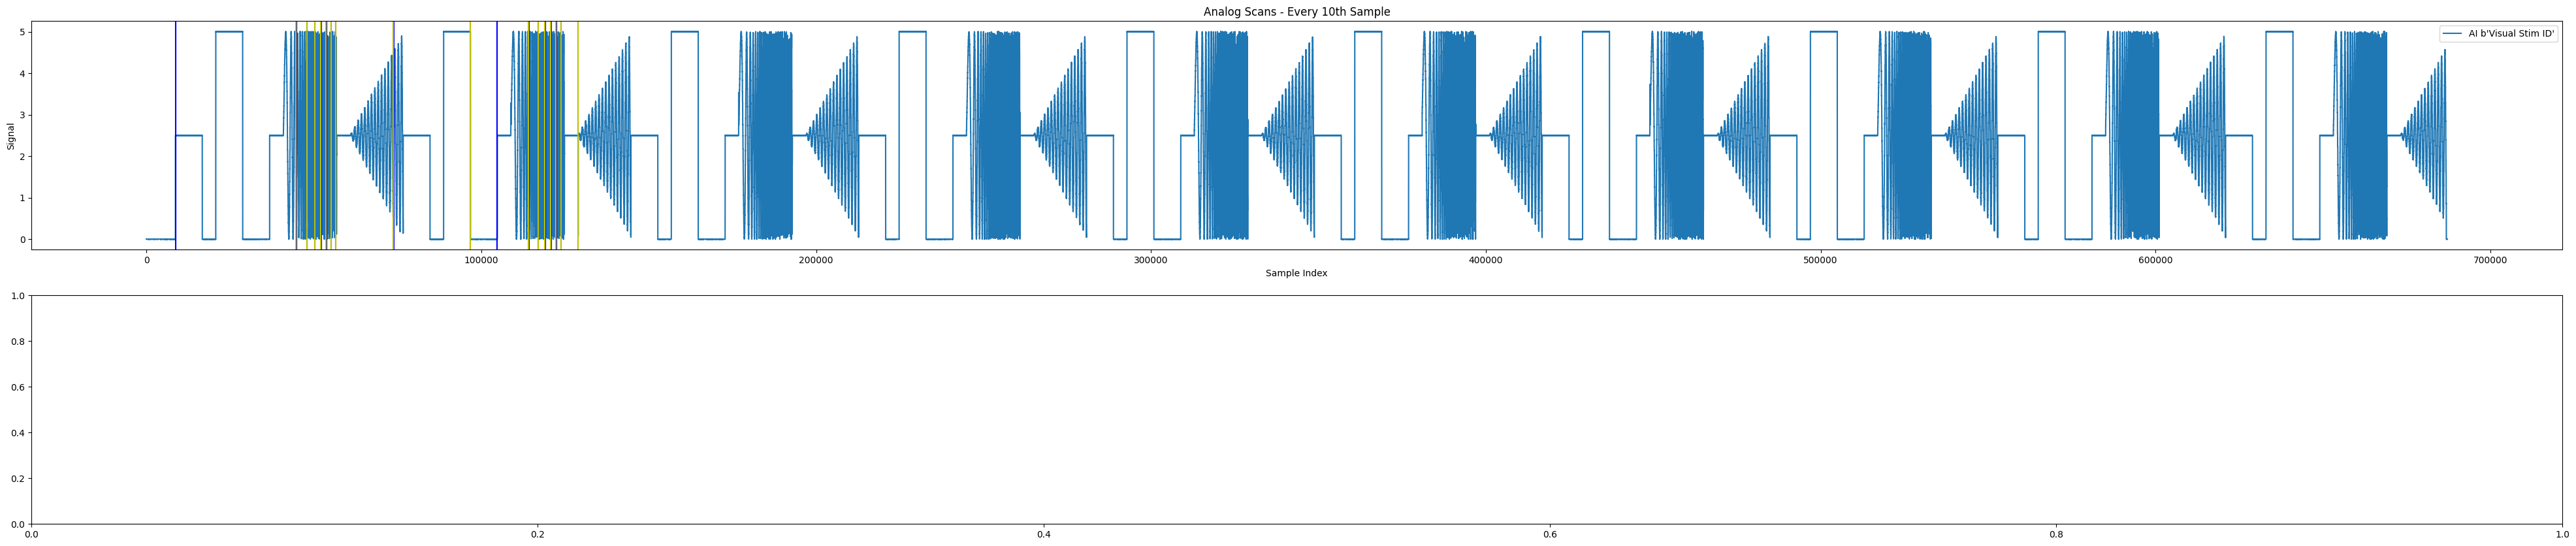

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(50, 10))
sr = curr_file['header']['AcquisitionSampleRate'][0][0]
# Plotting analogScans
axes[0].set_title(f"Analog Scans - Every {step}th Sample")
# for i in range(analog_scans.shape[0]):
i = 0
axes[i].plot(np.abs(analog_scans[i][::step]), label=f"AI {analog_labels[i]}")
axes[i].legend()
axes[i].set_xlabel("Sample Index")
axes[i].set_ylabel("Signal")


if i == 0:
     onsets = (event.Event & scan_key & "event_type = 'aux_bonsai_vis'").fetch('event_start_time') * sr / step
     offsets = (event.Event & scan_key & "event_type = 'aux_bonsai_vis'").fetch('event_end_time') * sr / step
     edges = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_start_time",order_by = "event_start_time")[::stims_per_trial] * sr / step
     edgesoff = (event.Event & scan_key & 'event_type LIKE "%;%"').fetch("event_end_time",order_by = "event_end_time")[stims_per_trial-1::stims_per_trial] * sr / step
     for xc in onsets:
          axes[i].axvline(x=xc, color = 'r')
     for xc in offsets:
          # axes[i].axvline(x=xc, color = 'r')
          axes[i].axvline(x=xc, color = 'w')
     for xc in edges:
          # axes[i].axvline(x=xc, color = 'r')
          axes[i].axvline(x=xc, color = 'b')
     for xc in edgesoff:
          # axes[i].axvline(x=xc, color = 'r')
          axes[i].axvline(x=xc, color = 'y')

In [23]:
ibe.get_timestamps(np.abs(analog_scans[i]), sr, 1)

array([  4.3257 ,   8.32755,  10.34175, ..., 342.904  , 343.0084 ,
       343.3912 ])

In [ ]:
event.Event & scan_key

In [ ]:
(event.Event & scan_key & "event_type = 'aux_bonsai_vis'").fetch('event_start_time')
# auxgatetimestamp_end = (event.Event()  &  "event_type='main_track_gate'" &  scanquery ).fetch('event_end_time')

In [ ]:
dj.Diagram(trial) + dj.Diagram(event) +100


In [ ]:
surgery

In [ ]:
dj.Diagram(subject.Subject) + dj.Diagram(event) + dj.Diagram(scan)

In [ ]:
fp = event.BehaviorRecording.File().fetch('filepath')
print(fp)


In [ ]:
scan.Scan()

In [ ]:
event.AlignmentEvent()

In [ ]:
trial.Trial()

In [ ]:
dj.Diagram(event)

In [ ]:
session.Session * session.SessionDirectory

In [ ]:
key='scan9FF6U114'
(scan.Scan & f'scan_id=\"{key}\"')

In [ ]:
scan.Scan()

`CB DEV NOTE:` In demo file, there are no `scan.motor_position_at_zero` values. Set to 0 here to avoid downstream type errors when adding. Future would should set these to null when not present and revise downstream code.

In [ ]:
scan.ScanInfo()

In [ ]:
scan.ScanInfo.Field()

Note the relative path below:

In [ ]:
scan.ScanInfo.ScanFile()

In [ ]:
event.BehaviorRecording.File()


In [ ]:
(event.BehaviorRecording.File ).fetch1("filepath")

# Treadmill handling and ingestion

In [10]:
behavior.TreadmillDevice()

treadmill_device_id,treadmill_device_name,treadmill_device_description
1,rotary encoder,BPod rotary encoder on running wheel


In [11]:
behavior.TreadmillRecording.Channel() 

session_id,scan_id,treadmill_device_id,channel_name,data 1d array of acquired data for this channel,time 1d array of timestamps for this channel
sess9FH37WBZ,scan9FH37WBZ,1,wheel_pos,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELAYA,1,wheel_pos,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELMRY,1,wheel_pos,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHELX2S,1,wheel_pos,=BLOB=,=BLOB=
sess9FHELAYA,scan9FHEMBE2,1,wheel_pos,=BLOB=,=BLOB=
sess9FHS7Y22,scan9FHS7Y22,1,wheel_pos,=BLOB=,=BLOB=
sess9FHS7Y22,scan9FHS845A,1,wheel_pos,=BLOB=,=BLOB=
sess9FIG39RU,scan9FIG39RU,1,wheel_pos,=BLOB=,=BLOB=
sess9FIG39RU,scan9FIG3GCJ,1,wheel_pos,=BLOB=,=BLOB=
sess9FIG39RU,scan9FIG3MU8,1,wheel_pos,=BLOB=,=BLOB=


In [15]:
treadmill = (behavior.TreadmillRecording.Channel() & scan_key).fetch("data")[0]
time = (behavior.TreadmillRecording.Channel() & scan_key).fetch("time")[0]

Text(0.5, 0, 'Time [s]')

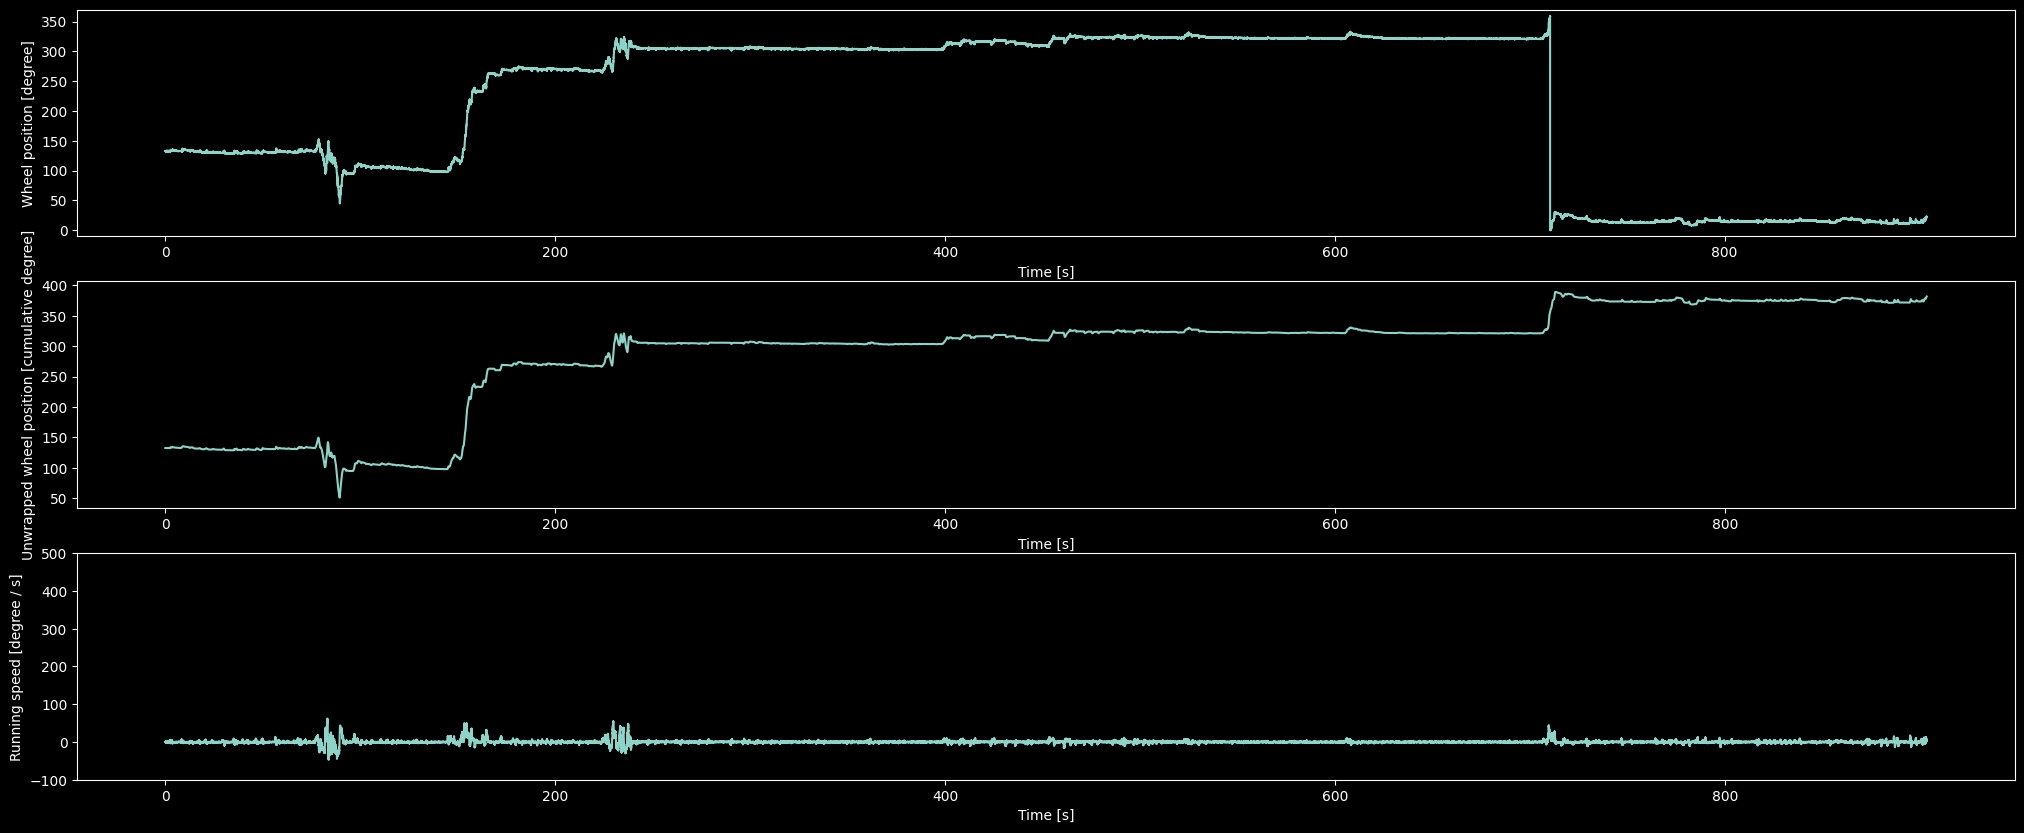

In [17]:
# smoothing window size (ms)
window = 1000

# convert voltage to degree
treadmillnorm = (treadmill-np.min(treadmill)) / np.max(treadmill) * 360

# compute running speed (see function above)
angular_velocity_smoothed, unwrapped_angle_smoothed = ibe.compute_angular_velocity(time, treadmillnorm, window)


fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25, 10))
# plt.rcParams['agg.path.chunksize'] = 10000  # Add this line if it does not rende

# Plotting the time series
axes[0].plot(time, treadmillnorm)
axes[0].set_ylim([-10, 370])
axes[0].set_ylabel("Wheel position [degree]")
axes[0].set_xlabel("Time [s]")

axes[1].plot(time[:-window+1],unwrapped_angle_smoothed )
# axes[1].set_ylim([-10000, 10000])
axes[1].set_ylabel("Unwrapped wheel position [cumulative degree]")
axes[1].set_xlabel("Time [s]")

axes[2].plot(time[:-window],angular_velocity_smoothed)
axes[2].set_ylim([-100, 500])
axes[2].set_ylabel("Running speed [degree / s]")
axes[2].set_xlabel("Time [s]")

# plt.show() 

In [ ]:
dj.Diagram(behavior) + dj.Diagram(event)-10 + dj.Diagram(trial)